In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/car_price.csv')

df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

<Figure size 864x576 with 0 Axes>

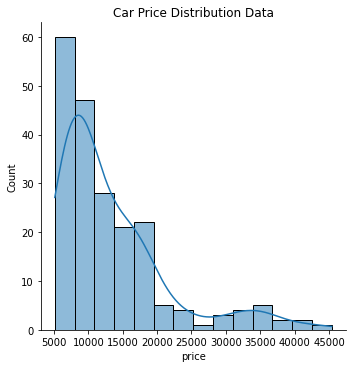

In [21]:
plt.figure(figsize=(12,8))
sns.displot(df['price'], kde=True)
plt.title('Car Price Distribution Data')
plt.show()

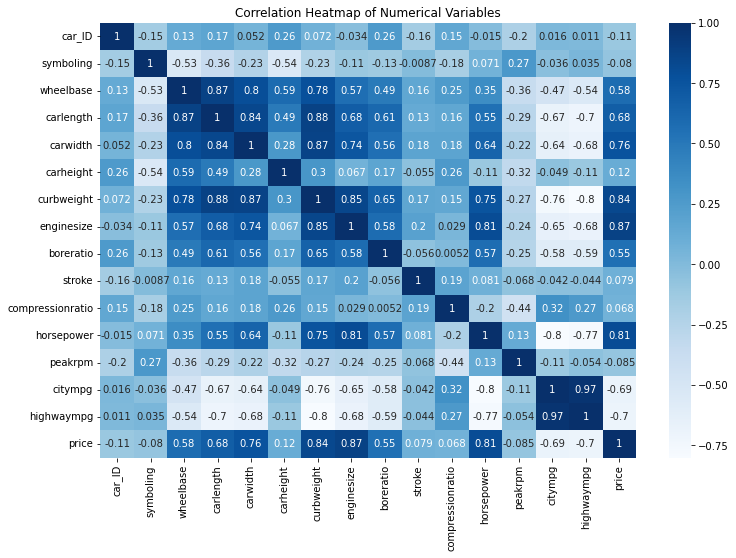

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

<Figure size 864x576 with 0 Axes>

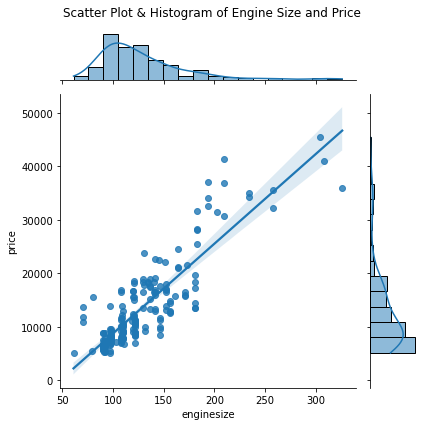

In [19]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df, x='enginesize', y='price', kind='reg').fig.suptitle("Scatter Plot & Histogram of Engine Size and Price")
plt.tight_layout()
plt.show()

In [8]:
df = df.sample(frac=1).reset_index(drop=True)

df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0      23          1       dodge challenger se      gas        std        two   
1     177         -1            toyota corolla      gas        std       four   
2     130          1           porsche cayenne      gas        std        two   
3      25          1         dodge monaco (sw)      gas        std       four   
4      68         -1  buick electra 225 custom   diesel      turbo       four   

     carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  hatchback        fwd          front       93.7  ...          90   
1      sedan        fwd          front      102.4  ...         122   
2  hatchback        rwd          front       98.4  ...         203   
3  hatchback        fwd          front       93.7  ...          90   
4      sedan        rwd          front      110.0  ...         183   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        2bbl       2.97    3.23              9.4         68     5500      31   
1        mpfi       3.31    3.54              8.7         92     4200      27   
2        mpfi       3.94    3.11             10.0        288     5750      17   
3        2bbl       2.97    3.23              9.4         68     5500      31   
4         idi       3.58    3.64             21.5        123     4350      22   

   highwaympg    price  
0          38   6377.0  
1          32  10898.0  
2          28  31400.5  
3          38   6229.0  
4          25  25552.0  

[5 rows x 26 columns]

In [9]:
x = df['enginesize']

y = df['price']

In [10]:
# add constant (represent of intercept) to x variable (where y = a + bx)

x = sm.add_constant(x)
x.head()

const  enginesize
0    1.0          90
1    1.0         122
2    1.0         203
3    1.0          90
4    1.0         183

In [11]:
train_size = int(0.75 * len(x))

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

In [12]:
x_train.shape, x_test.shape

((153, 2), (52, 2))

In [13]:
model = sm.OLS(y_train, x_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     540.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           9.52e-52
Time:                        18:33:40   Log-Likelihood:                -1480.0
No. Observations:                 153   AIC:                             2964.
Df Residuals:                     151   BIC:                             2970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8962.0872   1004.975     -8.918      0.000   -1.09e+04   -6976.458
enginesize   174.4709      7.505     23.246      0.000     159.642     189.300
==============================================================================
Omnibus:                       15.526   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.853
Skew:                           0.601   Prob(JB):                     2.96e-05
Kurtosis:                       4.351   Cond. No.                         430.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The square of the model, which is 0.63 or 63%, suggests that the linear model is reasonably effective in predicting price, considering it uses only one feature. This value indicates that 63% of the variance in the underlying data was captured by the model.

The F-statistic and its corresponding P-value assess the validity of the regression analysis as a whole. A P-value less than 5% indicates the analysis is valid. The null hypothesis for this test is that all regression coefficients are equal to zero, which is not the case here. Thus, we can reject the null hypothesis and accept the alternative hypothesis that regression coefficients are not equal to zero.

For each regression coefficient, a P-statistic and corresponding P-value measure the precision of the coefficient and its validity. The P-values of 0.001 for the intercept and 0 for the enginesize coefficient indicate their validity. The T-statistic and P-value confirm that the relationship between enginesize and price is statistically significant.

eval_env: 1


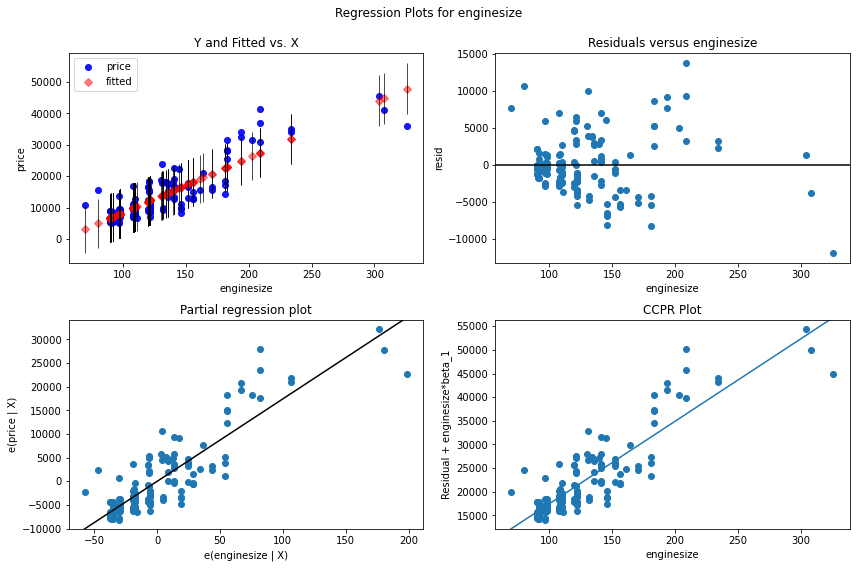

In [14]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model, 'enginesize', fig=fig)

plt.show()

The statsmodels' plot_regress_exog function allows for viewing regression results against a single regressor, which in this case is enginesize. Four different plots are generated by this function:

* The upper-left ('Y and Fitted vs. X') plot displays the fitted values of the regression line (in red) versus the actual values of enginesize and price, with vertical lines representing prediction confidence intervals for each fitted value.
* The second plot, showing the residuals of the regression versus the predictor variable (enginesize), can help identify any non-linear patterns. If residuals are evenly spread out around the 0 line, it indicates that the regression model does not have any non-linear patterns.
* The Partial regression plot is used to demonstrate the effect of adding an independent variable to a model that already has one or more independent variables. As this is a single-variable model, the Partial regression plot simply displays a scatter plot of price versus horsepower with a fitted regression line.
* Lastly, the CCPR (Component-Component Plus Residual) plot allows for assessing the impact of one regressor (enginesize) on the response variable (price) while accounting for the effects of other independent variables. In this case, as there are no other independent variables in this regression, the plot simply shows a scatter plot with a linear model fit on the data.

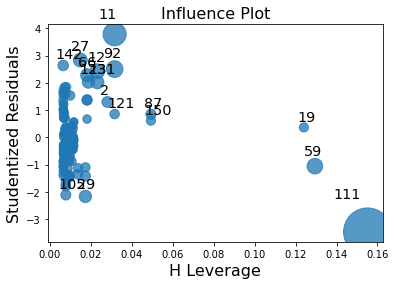

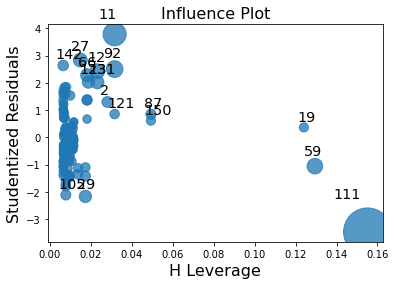

In [15]:
sm.graphics.influence_plot(model)

The influence_plot can be utilized to gain a deeper understanding of the regression model. This plot enables the identification of records in the dataset that have had a significant influence on the regression analysis. The influential data points can be recognized by their large circles in the plot. For instance, the data points with ID 111, 11 and 59 have had a significant impact on the regression results.

In [16]:
y_pred = model.predict(x_test)

y_pred.head()

153    22617.146212
154    12323.362955
155     7089.235875
156     9008.415805
157    36051.405718
dtype: float64

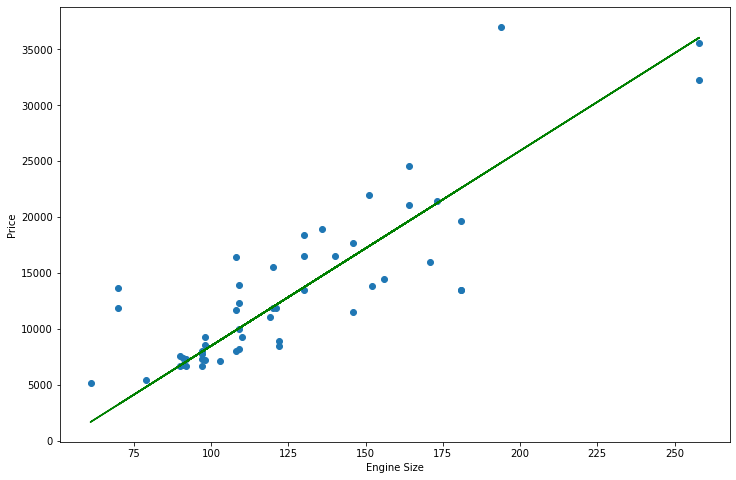

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test['enginesize'], y_test)
plt.plot(x_test['enginesize'], y_pred, color='g')

plt.xlabel('Engine Size')
plt.ylabel('Price')

plt.show()

In [18]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6894281468438609